# Assignment 2

by Nicolás Larrañaga C and Jonathan Alberto Ortiz Rodriguez

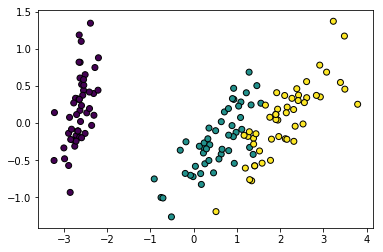

In [144]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from random import randint
import math
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

## 1.a
Use the data for classes 1 and 2 to estimate the parameters of a bivariate Gaussian
distribution for each class. Assume that the covariance matrix is the same for both
classes. Write the parameters of the probability distribution functions for both classes.
## solution
According to the documentation of sklearn , this data set has the next properties 

| Iris              |   properties  |
|-------------------|:-------------:|
| Classes           | 3             |
| samples per class |       50      |
| samples total     |      150      |
| features          | real,positive |
As we know a multivariate Gaussian is given by 
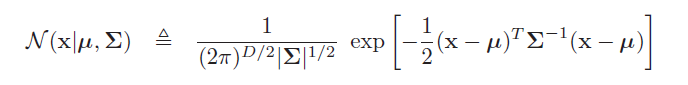



where  $$\mu = E[x] \in \mathbb{R}^{D}$$ and $$\Sigma = cov[x] D \times D $$ are the parameters of the previus equation


We start by calculating $E[x] = \mu = [\mu_1, \mu_2]^T$ from the sample data we have

In [145]:
def get_mean_vector(X, y, c, dimensions):
    mu = []
    r = list(map(lambda x : 1 if x == c else 0, y))
    for d in range(dimensions):
        mu.append( np.dot(np.transpose(np.array(X))[d],np.transpose(np.array(r)))/ np.dot(np.array(r),np.array(r)))
    return np.array(mu)
  
mu = []
mu.append(get_mean_vector(X,y,0,2))
mu.append(get_mean_vector(X,y,1,2))
mu.append(get_mean_vector(X,y,2,2))
print (mu)

[array([-2.64084076,  0.19051995]), array([ 0.53199262, -0.24402963]), array([2.10884814, 0.05350968])]


Now we estimate the covariance matrix $S = Cov(X)$ as such:

In [146]:
def get_points_from_class(X, y, c):
    points = []
    for a,b in zip(X, y):
        if b == c:
            points.append(a)
    return np.array(points)

def get_covariance(X, mu):
    return (X - mu).transpose().dot(X - mu)/ X.shape[0]

X_C1 = get_points_from_class(X, y, 1)
X_C2 = get_points_from_class(X, y, 2)

cov = get_covariance(X_C1, mu[0])
print (cov)


[[10.41586526 -1.18432186]
 [-1.18432186  0.36962311]]


Thus we obtain the following

$N(C_1 | [0.531, -0.24], [[0.34899363 0.19443157]
 [0.19443157 0.18078976]])$
 
 and
 
 $ N(C_2 | [2.108, 0.0535], [[0.34899363 0.19443157]
 [0.19443157 0.18078976]])$

## 1.b
Write a Python function that calculates the discriminant function for each class.


we use a discriminant function as such

$ g_i(x) =  -\frac{d}{2}log2\pi - \frac{1}{2}log | \Sigma_i | - \frac{1}{2}(x - \mu_i)^T\Sigma_i^{-1}(x - \mu_i) + logP(C_i)$

however this function can be reduced excluding common terms among different classes, thus it becomes 

$g_i(x) = (x - \mu_i) \dot (x - \mu_i)$

In [147]:
def discriminant(x, mu, c):
    return (x - mu[c]).dot(x - mu[c])

# 1.c
Draw a plot, where the regions corresponding to the different classes are shown with
different colors. 

Let's use the discriminant that we've already found to divide the points in two regions via a classifier

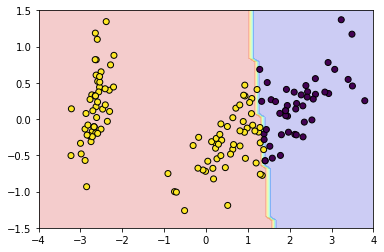

In [148]:
def classify_1(x, mu, classes):
    idx = classes[0]
    best = discriminant(x, mu, classes[0])
    for i in classes:
        if discriminant(x, mu, i) > best:
            idx = i
            best = discriminant(x, mu, i)
    return idx

classes = [1, 2]

classification = list(map( lambda point : classify_1(point, mu, classes), X ))

x_l = np.linspace(-4, 4, 60)
y_l = np.linspace(-1.5, 1.5, 60)
xx, yy = np.meshgrid(x_l,y_l)

zz = []
for i in range(xx.shape[0]):
    zz.append([])
    for j in range(xx.shape[1]):
        pt = np.array([xx[i][j], yy[i][j]])
        zz[i].append(classify_1(pt, mu, classes))
zz = np.array(zz)
        

plt.contourf(xx, yy, zz, cmap='jet', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=classification, edgecolor='k')

# 1.d
The boundary between both class regions must be a line. Calculate the equation of this
line clearly explaining the deduction process. Draw the line along with the regions.

We can use the slope equation which is $y - y_1 = m(x - x_1)$, the point $(x_1,y_1)$ is located in the middle of the means, so the slope is calculated as $-\frac{1}{m}$ 

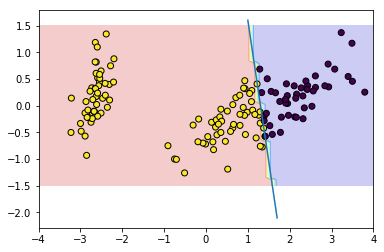

In [149]:
def line(x, mu):
    m = (-(mu[1][0] - mu[2][0])/(mu[1][1] - mu[2][1]))
    pt = (mu[1] + mu[2])/2
    return (x - pt[0])*m + pt[1]

plt.contourf(xx, yy, zz, cmap='jet', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=classification, edgecolor='k')

a = 1
b = 1.7
plt.plot([a, b], [line(a, mu), line(b, mu)])

# 1.e

What happens with the boundary line if we change the prior probabilities of the classes?
Illustrate with a graphical example.

The line moves nearer to the class with the highest probability

# 2

 Repeat steps (a) to (c) from previous item, but this time:
 
(a) Use data from the three classes.
(b) Estimate a different covariance matrix for each class

As parameters we have the following means and covariance matrices

In [150]:
cov = []
classes = [0, 1, 2]
for c in classes:
    cov.append(get_covariance(get_points_from_class(X, y, c), mu[c]))

for c in classes:
    print("class ", c, " follows a multivariate normal distribution with parameters: ")
    print("mu = ", mu[c])
    print("S = ", cov[c])

class  0  follows a multivariate normal distribution with parameters: 
mu =  [-2.64084076  0.19051995]
S =  [[0.04777048 0.05590782]
 [0.05590782 0.21472356]]
class  1  follows a multivariate normal distribution with parameters: 
mu =  [ 0.53199262 -0.24402963]
S =  [[0.34899363 0.19443157]
 [0.19443157 0.18078976]]
class  2  follows a multivariate normal distribution with parameters: 
mu =  [2.10884814 0.05350968]
S =  [[0.48896484 0.26977165]
 [0.26977165 0.22766092]]


Given the new constraints we define a new discriminant function

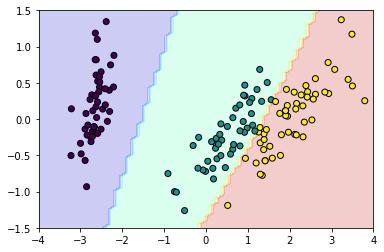

In [151]:
def multivariate_discriminant( x, m, cov, c ):
    return -1/2 * ( math.log10( np.linalg.det( cov[ c ] ) ) + (x - m[c]).dot( np.linalg.inv(cov[c]) ).dot( (x - m[c]).transpose() ) )

def classifier(x, mu, cov, classes):
    idx = classes[0]
    best = multivariate_discriminant(x, mu, cov, classes[0])
    for i in classes:
        if multivariate_discriminant(x, mu, cov, i) > best:
            idx = i
            best = multivariate_discriminant(x, mu, cov, i)
    return idx

classification = list(map( lambda point : classifier(point, mu, cov, classes), X ))

x_l = np.linspace(-4, 4, 60)
y_l = np.linspace(-1.5, 1.5, 60)
xx, yy = np.meshgrid(x_l,y_l)

zz = []
for i in range(xx.shape[0]):
    zz.append([])
    for j in range(xx.shape[1]):
        pt = np.array([xx[i][j], yy[i][j]])
        zz[i].append(classifier(pt, mu, cov, classes))
zz = np.array(zz)
        

plt.contourf(xx, yy, zz, cmap='jet', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=classification, edgecolor='k')

# 3 

Repeat the previous item, but this time

# 3.a
Use only a portion of the dataset (80% of the samples) to estimate the parameters of
the probability distribution functions of each class.

Using only 80 percent of the data (chosen randomly) we obtain the following parameters

In [152]:
seed = randint(0, 100)

random_X, random_Y = shuffle(X, y, random_state=seed)

size = int(0.8*x.shape[0])
eighty_percent_x , twenty_percent_x, eighty_percent_y, twenty_percent_y = random_X[:size], random_X[size:], random_Y[:size], random_Y[size:]

mu = []
cov = []
for c in classes:
    mu.append(get_mean_vector(eighty_percent_x,eighty_percent_y,c,2))
    cov.append(get_covariance(get_points_from_class(eighty_percent_x, eighty_percent_y, c), mu[c]))

for c in classes:
    print("class ", c, " taking only 80 percent of the data, follows a multivariate normal distribution with parameters: ")
    print("mu = ", mu[c])
    print("S = ", cov[c])

class  0  taking only 80 percent of the data, follows a multivariate normal distribution with parameters: 
mu =  [-2.61424915  0.20892689]
S =  [[0.05272573 0.07768778]
 [0.07768778 0.29224456]]
class  1  taking only 80 percent of the data, follows a multivariate normal distribution with parameters: 
mu =  [ 0.57951683 -0.33019914]
S =  [[0.40842378 0.23834038]
 [0.23834038 0.2468943 ]]
class  2  taking only 80 percent of the data, follows a multivariate normal distribution with parameters: 
mu =  [2.26760776 0.05567201]
S =  [[0.4223628  0.24355449]
 [0.24355449 0.18946449]]


# 3.b
Write a function that calculates the discriminant function for each class, taking into
account the possibility of rejection with a cost λ and cost 1 for misclassification. Look for values of λ that produce a rejection region easily distinguishable
from the other regions.
    

First we define our risk function based on the probability density function of the multinomial distribution, from this we construct our classifier.

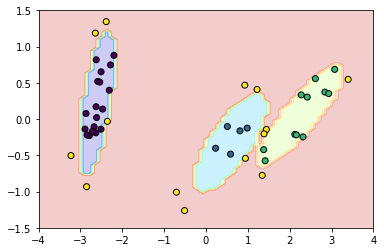

In [153]:
def p(x, mu, cov, c):
    return 1/( (2*math.pi)*np.linalg.det(cov[c])**(1/2)) * math.exp(-1/2*(x - mu[c]).dot(np.linalg.inv(cov[c])).dot((x-mu[c]).transpose()))
def risk(x, mu, cov, c):
    return  1 - p(x, mu, cov, c)

def classifier( x, mu, cov, lamb, classes ):
    idx = 3
    best = lamb
    for i in classes:
        if risk( x, mu, cov, i) < best:
            idx = i
            best = risk( x, mu, cov, i)
    return idx

lamb = 0.7
eighty_percent_x = np.array(eighty_percent_x)
eighty_percent_y = np.array(eighty_percent_y)

classification = list(map( lambda point : classifier(point, mu, cov, lamb, classes),  eighty_percent_x ))

x_l = np.linspace(-4, 4, 60)
y_l = np.linspace(-1.5, 1.5, 60)
xx, yy = np.meshgrid(x_l,y_l)

zz = []
for i in range(xx.shape[0]):
    zz.append([])
    for j in range(xx.shape[1]):
        pt = np.array([xx[i][j], yy[i][j]])
        zz[i].append(classifier(pt, mu, cov, lamb, classes))
zz = np.array(zz)
        

plt.contourf(xx, yy, zz, cmap='jet', alpha=0.2)
plt.scatter(eighty_percent_x[:, 0], eighty_percent_x[:, 1], marker='o', c=classification, edgecolor='k')

# 3.c

Classify the rest of the dataset that was not used for estimation (20%), using a classifier
based on the discriminant functions. Evaluate the results using a confusion matrix.

We define our confusion matrix as follows

In [154]:
twenty_percent_x = np.array(twenty_percent_x)
twenty_percent_y = np.array(twenty_percent_y)
classification = list(map( lambda point : classifier(point, mu, cov, lamb, classes),  twenty_percent_x ))

confusion_matrix = [[0 for i in range(3)] for j in range(4)]

for i in range(len( twenty_percent_y)):
    confusion_matrix[classification[i]][twenty_percent_y[i]] +=1
print(confusion_matrix)

[[23, 0, 0], [0, 29, 3], [0, 0, 22], [4, 10, 11]]


now we proceed to plot the classes based on the discriminant functions

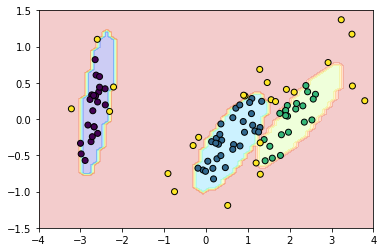

In [155]:
x_l = np.linspace(-4, 4, 60)
y_l = np.linspace(-1.5, 1.5, 60)
xx, yy = np.meshgrid(x_l,y_l)

zz = []
for i in range(xx.shape[0]):
    zz.append([])
    for j in range(xx.shape[1]):
        pt = np.array([xx[i][j], yy[i][j]])
        zz[i].append(classifier(pt, mu, cov, lamb, classes))
zz = np.array(zz)
        

plt.contourf(xx, yy, zz, cmap='jet', alpha=0.2)
plt.scatter(twenty_percent_x[:, 0], twenty_percent_x[:, 1], marker='o', c=classification, edgecolor='k')